# Link Prediction

Um die Reichweite des Imperators im Sozialen Netzwerk zu vergrössern, verwenden wir eine Link Prediction. Somit wollen wir für nicht-verbundene Knoten eine passende Verbindung finden, um das Netzwerk zu vergrössern.

## Common Neighbours

Common Neighbours berechnet für zwei nich verbunde Knoten, wieviele gemeinsame nNachbarn existieren. 

Die Formel für gemeinsame Nachbarn lautet: 
$
\text{common\_neighbours}(X, Y) = \lvert N(X) \cap N(Y) \rvert
$

In [3]:
import json
import networkx as nx
import matplotlib.pyplot as plt
with open('data/starwars-episode-1-interactions-allCharacters.json') as f:
    data_interactions = json.load(f)

# Graph erstellen: nutze direkt den 'name' aus den Node-Daten
G = nx.Graph()

for node in data_interactions['nodes']:
    # Verwende den 'name' als Knotenidentifikator
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    # Falls source und target Indizes im nodes-Array sind:
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)


# Link-Prediction mit Common Neighbours
potential_links = []
nodes = list(G.nodes())
n = len(nodes)

for i in range(n):
    for j in range(i+1, n):
        u = nodes[i]
        v = nodes[j]
        if not G.has_edge(u, v):
            cn_count = len(list(nx.common_neighbors(G, u, v)))
            if cn_count > 0:
                potential_links.append((u, v, cn_count))

potential_links.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Common Neighbours mit Namen:")
for u, v, score in potential_links[:10]:
    print(f"{u} - {v}: gemeinsame Nachbarn = {score}")

print(G)

Top 10 Link Predictions basierend auf Common Neighbours mit Namen:
NUTE GUNRAY - JAR JAR: gemeinsame Nachbarn = 5
OBI-WAN - EMPEROR: gemeinsame Nachbarn = 5
OBI-WAN - SEBULBA: gemeinsame Nachbarn = 5
OBI-WAN - KITSTER: gemeinsame Nachbarn = 5
OBI-WAN - JABBA: gemeinsame Nachbarn = 5
OBI-WAN - RABE: gemeinsame Nachbarn = 5
CAPTAIN PANAKA - SHMI: gemeinsame Nachbarn = 5
SIO BIBBLE - BOSS NASS: gemeinsame Nachbarn = 5
SIO BIBBLE - ANAKIN: gemeinsame Nachbarn = 5
BOSS NASS - RIC OLIE: gemeinsame Nachbarn = 5
Graph with 38 nodes and 135 edges


Unter den Top 10 Link predictions mittels Common Neighbours, haben alle den gleichen Score. 

Nun wollen wir die predicteten Links noch visuell darstellen. 

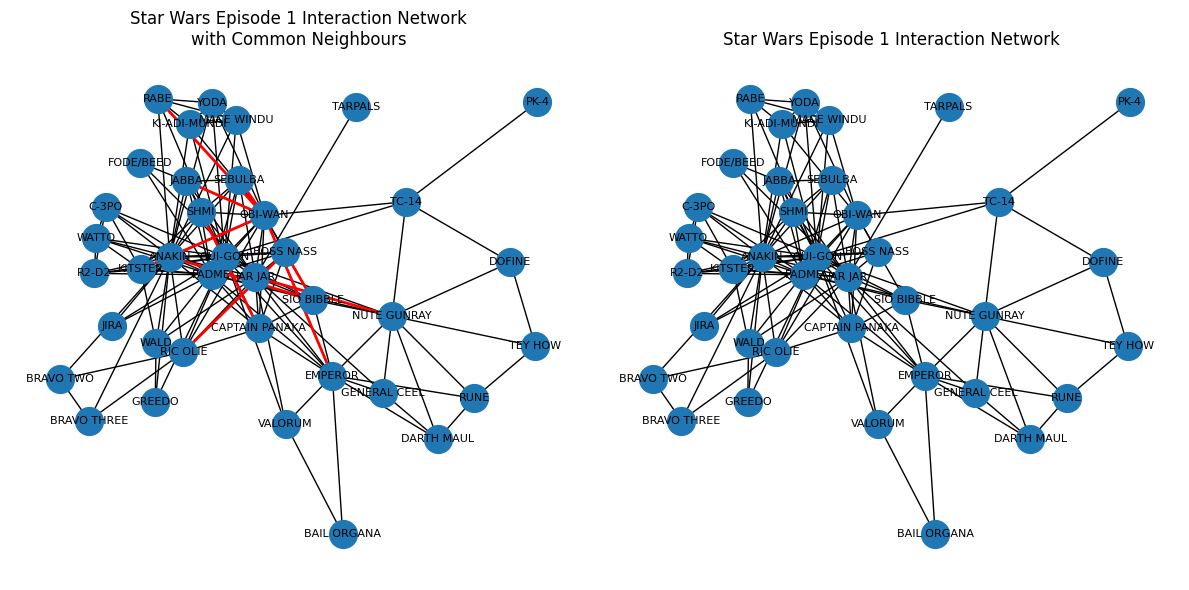

Graph with 38 nodes and 135 edges


In [5]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)

# Abmessungen für die gesamte Figure festlegen
plt.figure(figsize=(12, 6))

# Plot 1: Netzwerk mit Link Prediction (Common Neighbours)
plt.subplot(121)  # Erste von zwei gleich großen Subplots
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=potential_links[:10], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Common Neighbours")

# Plot 2: Netzwerk ohne Link Prediction
plt.subplot(122)  # Zweite von zwei gleich großen Subplots
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# Abbildung anzeigen
plt.tight_layout()  # Automatische Anpassung der Abstände zwischen den Subplots
plt.show()
print(G)

## Jaccard Coefficient

Die Jaccarcd Coefficient Metrik ist eine Erweiterung der Common Neighbours Metrik.
Sie berücksichtigt nicht nur die Anzahl gemeinsamer Nachbarn zweier Knoten, sondern
setzt diese ins Verhältnis zu den Anzahl Nachbarn beider Knoten.

Die Formel für die Jaccard Coefficient lautet wie folgt: 

$
\text{jaccard\_coefficient}(X, Y) = \frac{\lvert N(X) \cap N(Y) \rvert}{\lvert N(X) \cup N(Y) \rvert}
$


In [44]:
with open('data/starwars-episode-1-interactions.json') as f:
    data_interactions = json.load(f)

# Erstelle den Graphen
G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

# Jaccard-Koeffizienten für alle unverbundenen Paare berechnen
jaccard_scores = list(nx.jaccard_coefficient(G))

# jaccard_scores ist eine Liste von Tupeln (u, v, p) wobei p der Jaccard-Koeffizient ist
# Sortieren nach p absteigend
jaccard_scores.sort(key=lambda x: x[2], reverse=True)

# Top 10 ausgeben
print("Top 10 Link Predictions basierend auf Jaccard Coefficient:")
for u, v, score in jaccard_scores[:10]:
    print(f"{u} - {v}: Jaccard = {score:.4f}")

# Graph anzeigen
print(G)

Top 10 Link Predictions basierend auf Jaccard Coefficient:
BOSS NASS - SIO BIBBLE: Jaccard = 0.6250
BOSS NASS - RIC OLIE: Jaccard = 0.6250
RUNE - GENERAL CEEL: Jaccard = 0.6000
C-3PO - JIRA: Jaccard = 0.6000
JIRA - WATTO: Jaccard = 0.6000
BOSS NASS - SHMI: Jaccard = 0.5556
SEBULBA - KITSTER: Jaccard = 0.5556
BOSS NASS - SEBULBA: Jaccard = 0.5000
BOSS NASS - JIRA: Jaccard = 0.5000
SEBULBA - FODE/BEED: Jaccard = 0.5000
Graph with 37 nodes and 129 edges


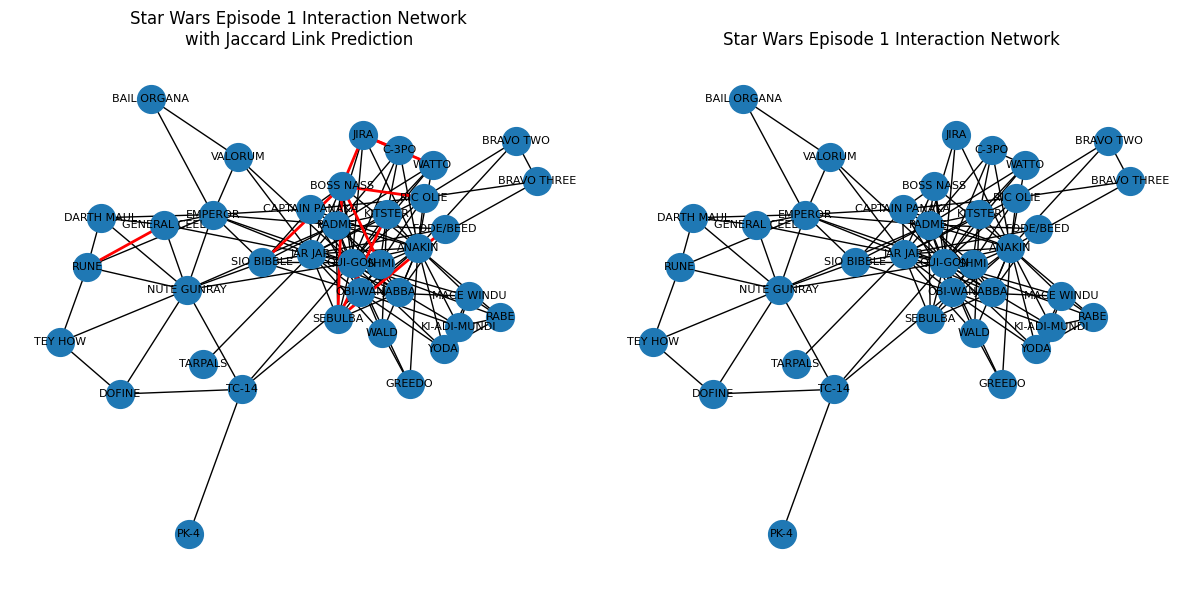

In [45]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)

# Abmessungen 
plt.figure(figsize=(12, 6))

# Plot 1: Netzwerk mit Jaccard Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in jaccard_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Jaccard Link Prediction")

# Plot 2: Netzwerk ohne Link Prediction
plt.subplot(122)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# Abbildung anzeigen
plt.tight_layout()  # Automatische Anpassung der Abstände zwischen den Subplots
plt.show()

## Resource Allocatoin

Der Ansatz bei der Resource Allocation basiert darauf, dass ein Knoten X Ressourcen (z. B. Informationen) über gemeinsame Nachbarn an einen nicht direkt verbundenen Knoten Z weiterleiten kann. 

X sendet die Ressource an einen gemeinsamen Nachbarn Y, der sie gleichmäßig auf alle seine Nachbarn verteilt. Hat Y viele Nachbarn, erhält Z nur einen kleinen Anteil der Ressource.

Die Formel für Resource Allocaton lautet: 
$$
\text{resource\_allocation}(X, Y) = \sum_{u \in N(X) \cap N(Y)} \frac{1}{|N(u)|}
$$


In [ ]:
with open('data/starwars-episode-1-interactions.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

# für alle links in data_interactions einen Knoten hinzufügen
for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)


# Resource Allocation
ra_scores = list(nx.resource_allocation_index(G))

# ra_scores ist eine Liste von (u, v, p) Tupeln, wobei p der RA-Wert ist
ra_scores.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Resource Allocation:")
for u, v, score in ra_scores[:10]:
    print(f"{u} - {v}: RA = {score:.4f}")
print(G)

Top 10 Link Predictions basierend auf Resource Allocation:
RABE - OBI-WAN: RA = 0.5855
NUTE GUNRAY - JAR JAR: RA = 0.5826
NUTE GUNRAY - OBI-WAN: RA = 0.4417
RUNE - GENERAL CEEL: RA = 0.4409
TC-14 - TEY HOW: RA = 0.4333
DOFINE - RUNE: RA = 0.4333
EMPEROR - OBI-WAN: RA = 0.4083
EMPEROR - TEY HOW: RA = 0.3500
DARTH MAUL - TEY HOW: RA = 0.3500
BOSS NASS - SIO BIBBLE: RA = 0.3424
Graph with 37 nodes and 129 edges


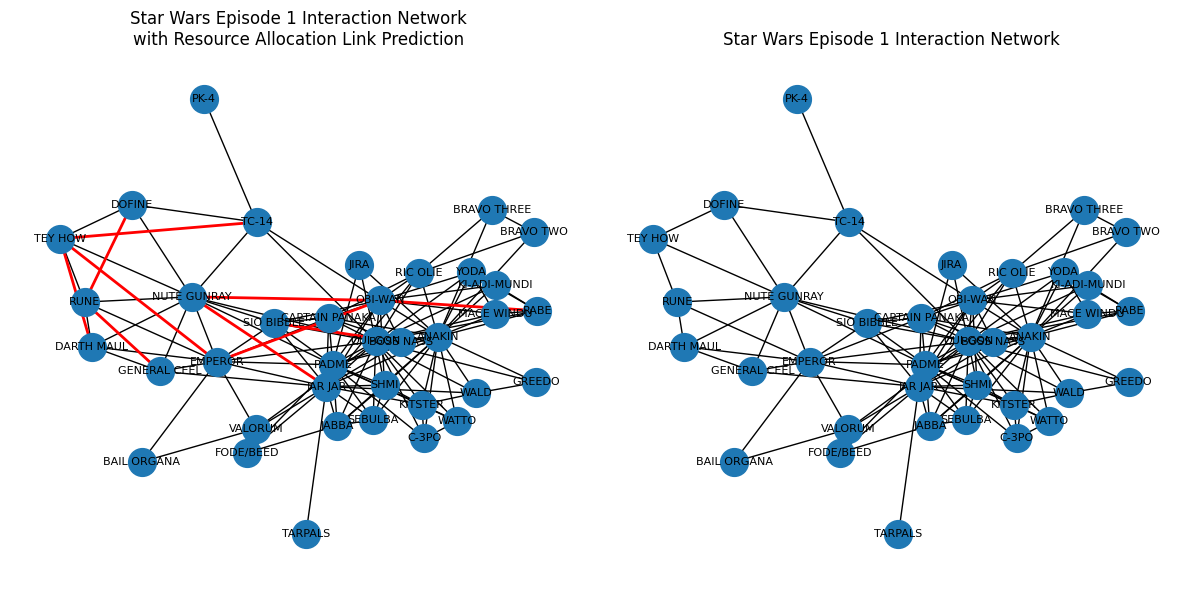

In [ ]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)

# Abmessungen für die gesamte Figure festlegen
plt.figure(figsize=(12, 6))

# Plot 1: Netzwerk mit RA Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in ra_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Resource Allocation Link Prediction")

# Plot 2: Netzwerk ohne Link Prediction
plt.subplot(122) 
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# Abbildung anzeigen
plt.tight_layout() 
plt.show()


## Ademic Adar

Diese Metrik berechnet sich fast genau gleich wie Resource Allocation. Der einzige
Unterschied ist, dass das Gewicht des Nenners abgeschwächt wird, indem da der Loga-
rithmus verwendet wird:

$$
\text{adamic\_adar}(X, Y) = \sum_{u \in N(X) \cap N(Y)} \frac{1}{\ln(|N(u)|)}
$$


In [ ]:
with open('data/starwars-episode-1-interactions.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)


# Adamic-Adar
aa_scores = list(nx.adamic_adar_index(G))

# aa_scores ist eine Liste von (u, v, p) Tupeln, wobei p der Adamic-Adar-Wert ist
aa_scores.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Adamic-Adar:")
for u, v, score in aa_scores[:10]:
    print(f"{u} - {v}: Adamic-Adar = {score:.4f}")

print(G)

Top 10 Link Predictions basierend auf Adamic-Adar:
NUTE GUNRAY - JAR JAR: Adamic-Adar = 2.3159
RABE - OBI-WAN: Adamic-Adar = 2.3085
EMPEROR - OBI-WAN: Adamic-Adar = 1.9786
BOSS NASS - SIO BIBBLE: Adamic-Adar = 1.8546
ANAKIN - SIO BIBBLE: Adamic-Adar = 1.8546
BOSS NASS - RIC OLIE: Adamic-Adar = 1.8252
PADME - RIC OLIE: Adamic-Adar = 1.8252
SEBULBA - OBI-WAN: Adamic-Adar = 1.8140
SEBULBA - KITSTER: Adamic-Adar = 1.8140
JABBA - OBI-WAN: Adamic-Adar = 1.8140
Graph with 37 nodes and 129 edges


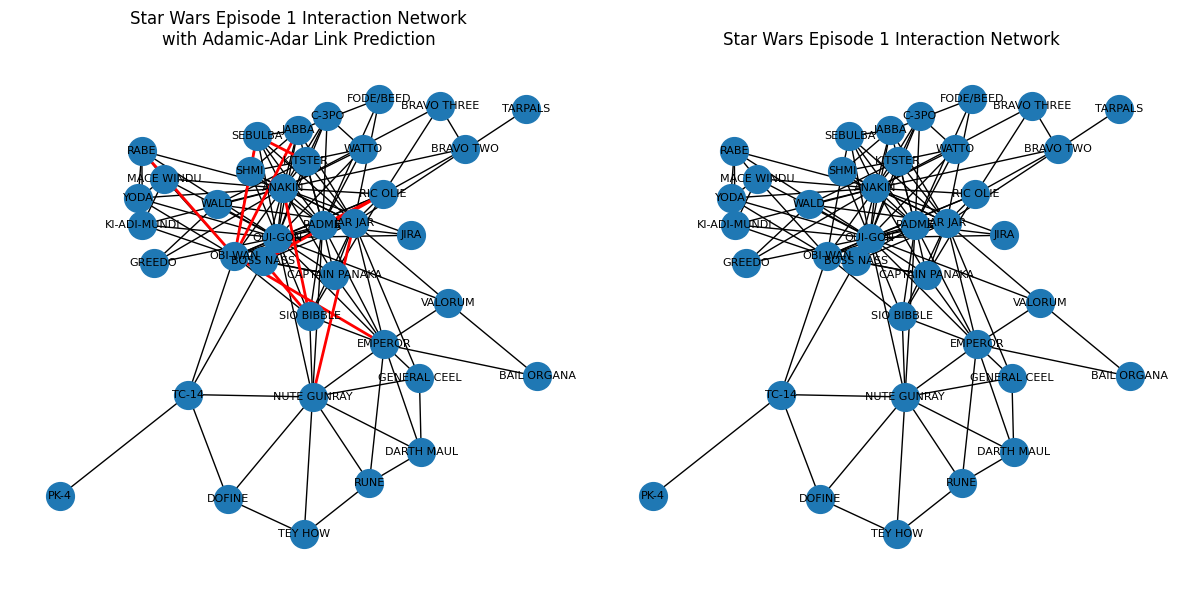

In [ ]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)

# Abmessungen für die gesamte Figure festlegen
plt.figure(figsize=(12, 6))

# Plot 1: Netzwerk mit Adamic-Adar Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in aa_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Adamic-Adar Link Prediction")

# Plot 2: Netzwerk ohne Link Prediction
plt.subplot(122)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# Abbildung anzeigen
plt.tight_layout() 
plt.show()

## Sind Links entstanden für 2. episode? 

Nun möchten wir prüfen, ob in Star Wars Episode 2 eine von den predicted links vorhanden ist.

In [ ]:
# check if Jar Jar and Nute Gurnay have connection in 2. episode

with open('data/starwars-full-interactions-allCharacters-merged.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

# checken ob Jar Jar und Nute Gurnay eine Konnektion in 2. episode haben
print("Jar Jar Binks - Nute Gunray connection in later episodes:")
print(G.has_edge('Jar Jar Binks', 
                    'Nute Gunray'))

print(G)

Jar Jar Binks - Nute Gunray connection in later episodes:
False
Graph with 111 nodes and 444 edges


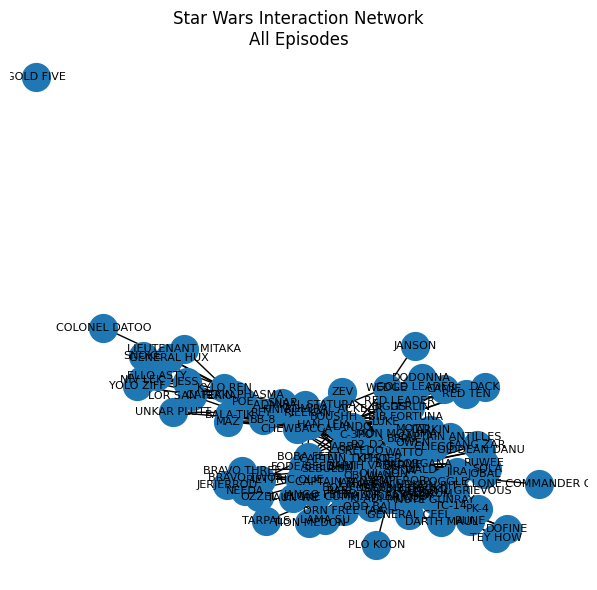

Graph with 111 nodes and 444 edges


In [52]:
# plot von Netzwerk mit allen Episoden
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)

# Abmessungen für die gesamte Figure festlegen
plt.figure(figsize=(12, 6))

# Plot 1: Netzwerk mit allen Episoden
plt.subplot(121)  # Erste von zwei gleich großen Subplots
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Interaction Network\nAll Episodes")

# Abbildung anzeigen
plt.tight_layout()  # Automatische Anpassung der Abstände zwischen den Subplots
plt.show()

# netzwerk printen
print(G)